In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Create non-linear "moons" dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train an SVM with RBF kernel (non-linear)
model = SVC(kernel='rbf', C=1.0, gamma='scale')  # C=penalty, gamma=kernel coefficient
model.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)


Test Accuracy: 0.95


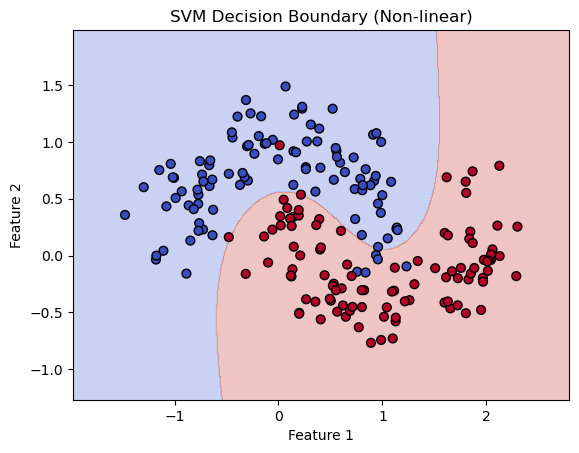

In [2]:
# Function to plot decision boundary
def plot_decision_boundary(clf, X, y):
    # Create meshgrid
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=40, edgecolors='k')
    plt.title("SVM Decision Boundary (Non-linear)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Call the plot function
plot_decision_boundary(model, X, y)
